# **Factor Models and ESG Factors**


**Objective**: To analyse ESG as a factor explaining stock returns.


### **1. Import and clean the data**
Load the dataset named `sample_esg_monthly_returns.csv` using the `pandas` library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/sample_esg_monthly_returns.csv", parse_dates=["date"], low_memory=False)
df["return"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset=["return"])

display(df)

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,return
0,10104,2004-01-30,NaN,11.0,3.0,7370.0,68389X10,ORCL,ORACLE CORP,NaN,...,13.86000,NaN,2004-01-30,0.047619,0.023042,0.022019,0.065763,0.064746,0.017276,0.047619
1,10104,2004-02-27,NaN,11.0,3.0,7370.0,68389X10,ORCL,ORACLE CORP,NaN,...,12.87000,NaN,2004-02-27,-0.071429,0.015443,0.013958,0.013720,0.012522,0.012209,-0.071429
2,10104,2004-03-31,NaN,11.0,3.0,7370.0,68389X10,ORCL,ORACLE CORP,NaN,...,12.00000,NaN,2004-03-31,-0.067599,-0.010662,-0.011985,0.006293,0.004664,-0.016359,-0.067599
3,10104,2004-04-30,NaN,11.0,3.0,7370.0,68389X10,ORCL,ORACLE CORP,NaN,...,11.25000,NaN,2004-04-30,-0.062500,-0.024222,-0.025568,-0.043590,-0.044794,-0.016791,-0.062500
4,10104,2004-05-28,NaN,11.0,3.0,7370.0,68389X10,ORCL,ORACLE CORP,NaN,...,11.40000,NaN,2004-05-28,0.013333,0.014068,0.012384,0.002593,0.000918,0.012083,0.013333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112079,93436,2024-08-30,NaN,11.0,3.0,9999.0,88160R10,TSLA,TESLA INC,NaN,...,214.11000,NaN,2024-08-30,-0.077390,0.021572,0.020203,-0.010883,-0.012627,0.022835,-0.077390
112080,93436,2024-09-30,NaN,11.0,3.0,9999.0,88160R10,TSLA,TESLA INC,NaN,...,261.63000,NaN,2024-09-30,0.221942,0.020969,0.019485,0.016322,0.013885,0.020197,0.221942
112081,93436,2024-10-31,NaN,11.0,3.0,9999.0,88160R10,TSLA,TESLA INC,NaN,...,249.85001,NaN,2024-10-31,-0.045025,-0.008298,-0.009139,-0.005589,-0.006922,-0.009897,-0.045025
112082,93436,2024-11-29,NaN,11.0,3.0,9999.0,88160R10,TSLA,TESLA INC,NaN,...,345.16000,NaN,2024-11-29,0.381469,0.064855,0.063463,0.063684,0.061936,0.057301,0.381469


### **2. Compute Monthly Returns**

In [2]:
series_by_ticker = {}
for t, g in df.groupby("TICKER", sort=True):
    s = g.set_index("date")["return"].sort_index()
    # make sure there are no duplicate dates left
    if not s.index.is_unique:
        s = s.groupby(level=0).last()  # aggregate any residual duplicates
    series_by_ticker[t] = s

rets = pd.concat(series_by_ticker, axis=1)
rets.columns.name = None
rets.index.name = "date"

rets = rets.replace([np.inf, -np.inf], np.nan)

# require >= 250 months per ticker
rets = rets.loc[:, rets.count() >= 250]

rets = rets.dropna(how="any")

display(rets)

,A,AAP,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WST,WY,WYNN,XEL,XOM,XRAY,YUM,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2004-03-31,-0.074876,0.030925,0.130435,-0.039720,-0.007310,0.055369,-0.037876,-0.019186,-0.007303,0.097010,...,0.004365,0.014100,0.003831,-0.036874,0.030195,-0.013754,0.010991,0.025925,-0.029519,-0.020079
2004-04-30,-0.146064,0.060979,-0.046598,0.077372,-0.046081,0.055980,-0.112685,0.040901,0.043095,0.063134,...,-0.045066,0.043048,-0.090076,0.140857,-0.060640,0.023082,0.093165,0.021058,0.056509,-0.008932
2004-05-28,-0.048501,-0.006489,0.088441,-0.004019,-0.042331,0.075422,0.155164,-0.048690,0.014152,0.070128,...,-0.020000,-0.020361,0.021622,-0.031806,0.015541,0.022797,0.019604,-0.033256,0.103561,0.088885
2004-06-30,0.139300,0.030558,0.159658,-0.010920,0.036922,0.042180,-0.042116,0.009020,-0.054243,0.194646,...,-0.053293,0.112865,0.043651,-0.000776,-0.004267,0.026821,0.055505,-0.007467,0.075668,0.002447
2004-07-30,-0.186817,-0.159801,-0.006146,-0.028214,-0.034604,-0.092903,-0.156754,-0.080453,0.002388,-0.060967,...,0.004738,-0.094563,-0.011407,-0.073777,0.023339,0.042558,-0.066603,0.034121,-0.050230,-0.015460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,-0.005981,-0.103482,0.095553,0.016831,-0.016954,0.249078,-0.022645,-0.031871,-0.019721,0.227431,...,0.029653,-0.006095,-0.054612,-0.056703,-0.026916,-0.018250,-0.104963,-0.036164,-0.010918,0.004168
2024-07-31,0.092617,0.003948,0.054411,0.024829,-0.050649,-0.007002,0.013669,0.025806,0.100256,0.000283,...,0.013735,-0.069887,0.118704,-0.074637,0.091181,0.030142,0.089522,0.002793,0.136795,0.191377
2024-08-30,0.010750,-0.284541,0.032286,0.069190,0.180727,0.041258,0.014954,-0.008386,0.050605,0.043956,...,0.128169,0.024366,-0.033690,-0.068703,0.050618,0.002530,-0.068165,0.020778,-0.016544,-0.032901


### **3. Import ESG Grades**
Load the ESG dataset and keep only the relevant columns:

In [3]:
esg = pd.read_csv("data/sample_esg.csv", usecols=["Ticker", "Year", "ESG Score", "E Score", "S Score", "G Score"], low_memory=False)
display(esg)

,Ticker,Year,ESG Score,E Score,S Score,G Score
0,AAL,2015,70.381659,58.469125,78.392611,71.691542
1,AAL,2016,70.500020,58.712121,74.099858,78.166947
2,AAL,2017,71.978831,61.503940,72.406978,82.870883
3,AAL,2018,69.393337,58.662140,72.790600,76.196125
4,AAL,2019,69.165517,57.036153,69.127348,82.564010
...,...,...,...,...,...,...
3074,ALLE,2017,45.061471,33.009329,59.419719,37.692308
3075,ALLE,2018,59.941009,45.255850,60.361053,67.847222
3076,ALLE,2019,59.309582,40.982276,62.165623,66.870748
3077,ALLE,2020,73.305939,72.010290,82.941602,64.511541


### **4. Define ESG Groups and Build Portfolios**
Each year, group stocks into four ESG categories based on their ESG scores.


**Table: Grouping scheme for ESG exposures**

| Group code | Classification     | Classification rule          |
|-------------|--------------------|-------------------------------|
| A           | Leader in E/S/G    | ESG<sub>i</sub> ≥ 70          |
| B           | Follower in E/S/G  | 70 > ESG<sub>i</sub> ≥ 60     |
| C           | Laggard in E/S/G   | 60 > ESG<sub>i</sub> ≥ 45     |
| D           | Poor in E/S/G      | ESG<sub>i</sub> < 45          |

In [4]:
def classify(score: float) -> str:
    if pd.isna(score):  return np.nan
    if score >= 70:     return "A"     # Leader
    if score >= 60:     return "B"     # Follower
    if score >= 45:     return "C"     # Laggard
    return "D"                          # Poor

esg["Group"] = esg["ESG Score"].apply(classify)
# keep only tickers present in returns panel
esg = esg[esg["Ticker"].isin(rets.columns)].reset_index(drop=True)

display(esg)


,Ticker,Year,ESG Score,E Score,S Score,G Score,Group
0,PNW,2014,61.617134,67.831007,64.076018,47.857000,B
1,PNW,2015,68.785235,68.763256,70.537764,66.544311,B
2,PNW,2016,58.993485,61.941905,56.895302,56.708810,C
3,PNW,2017,57.000626,61.362587,61.389225,43.880115,C
4,PNW,2018,62.712469,82.315300,59.285828,33.842289,B
...,...,...,...,...,...,...,...
2190,AIZ,2017,64.720274,40.087421,61.512786,82.946878,B
2191,AIZ,2018,61.295444,28.833744,53.622351,81.067953,B
2192,AIZ,2019,64.316666,28.525409,61.271628,79.799629,B
2193,AIZ,2020,63.973747,26.914894,61.034206,79.756163,B


use these groups to form four portfolios (rebalanced once per year) and compute their
average yearly returns.

In [5]:
groups = ["A","B","C","D"]

# monthly portfolio returns
port_monthly = {g: [] for g in groups}
all_months = []

years = sorted(set(esg["Year"]).intersection(set(rets.index.year)))

for y in years:
    esg_y = esg[esg["Year"] == y]
    if esg_y.empty: 
        continue

    members = {g: esg_y.loc[esg_y["Group"] == g, "Ticker"].unique().tolist() for g in groups}
    rets_y = rets.loc[rets.index.year == y].sort_index()
    if rets_y.empty:
        continue

    all_months.extend(rets_y.index.tolist())

    for g in groups:
        m = [t for t in members[g] if t in rets.columns]
        if len(m) == 0:
            port_monthly[g].extend([(dt, np.nan) for dt in rets_y.index])
        else:
            ew = rets_y[m].mean(axis=1)
            port_monthly[g].extend(list(zip(ew.index, ew.values)))


idx = pd.Index(sorted(set(all_months)), name="date")
port_df = pd.DataFrame(index=idx, columns=groups, dtype=float)
for g in groups:
    if port_monthly[g]:
        ser = pd.Series({dt: v for dt, v in port_monthly[g]}).sort_index()
        port_df[g] = ser.reindex(idx)

# If a group has no members in a month => 0 return
port_df = port_df.dropna(how="all").fillna(0.0)
display(port_df)


,A,B,C,D
date,,,,
2014-01-31,-0.048850,-0.017196,-0.016536,0.011505
2014-02-28,0.052905,0.045870,0.052610,0.051968
2014-03-31,0.017015,0.021159,0.008551,-0.006390
2014-04-30,0.002043,0.006890,-0.007492,-0.009196
2014-05-30,0.024784,0.018669,0.018277,0.033864
...,...,...,...,...
2023-08-31,-0.033202,-0.003007,-0.026156,-0.041606
2023-09-29,-0.058666,-0.084648,-0.027380,-0.035424
2023-10-31,-0.042079,-0.050945,-0.045160,-0.068356


### **5. Plot Equal-Weighted Portfolio Performance**
Using the four portfolios (equal-weighted), plot on the same graph the evolution of the <br>
cumulative returns of each portfolio based on monthly returns.

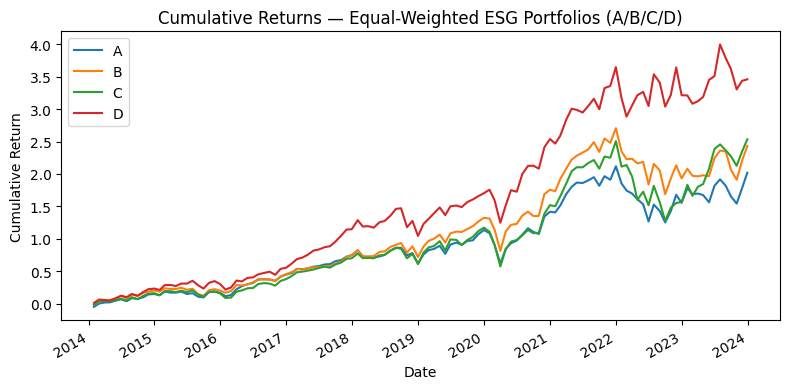

In [6]:
annual = (
    (1.0 + port_df).groupby(port_df.index.year).prod() - 1.0
)  # Year × Group table of annual returns

avg_annual = annual.mean().to_frame("Average Annual Return").T

# CUMULATIVE RETURN
cum_df = (1.0 + port_df).cumprod() - 1.0

# Plot all four cumulative 
ax = cum_df.plot(figsize=(8,4))   # multiple series
ax.set_title("Cumulative Returns — Equal-Weighted ESG Portfolios (A/B/C/D)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
plt.tight_layout()
plt.show()

### **6. Value-Weighted Portfolios**

Using the variables `SHROUT` (shares outstanding) and `PRC` (price), compute the monthly market capitalization for each stock. <br>
Then, construct four capitalization-weighted portfolios using the same ESG group classification and report the average monthly return of <br>
each portfolio.

In [7]:
df = df.copy()
df["PRC"]    = pd.to_numeric(df["PRC"], errors="coerce")
df["SHROUT"] = pd.to_numeric(df["SHROUT"], errors="coerce")
df["ME"]     = df["PRC"].abs() * df["SHROUT"] * 1000  # SHROUT is in thousands

# Keep one row per (TICKER, date)
df = df.sort_values(["TICKER", "date"]).drop_duplicates(["TICKER", "date"], keep="last")

mcap = df.pivot(index="date", columns="TICKER", values="ME").sort_index()
mcap = mcap.reindex(rets.index)  # align dates to rets

groups = ["A","B","C","D"]

# monthly portfolio returns
vw_monthly = {g: [] for g in groups}
all_months = []

for y in years:
    esg_y = esg[esg["Year"] == y]
    if esg_y.empty:
        continue

    # Membership fixed for calendar year y
    mem = {g: esg_y.loc[esg_y["Group"] == g, "Ticker"].unique().tolist() for g in groups}

    # Panels for that year
    r_y  = rets.loc[rets.index.year == y].sort_index()
    me_y = mcap.loc[mcap.index.year == y].reindex(r_y.index)
    if r_y.empty:
        continue

    all_months.extend(r_y.index.tolist())

    for g in groups:
        members = [t for t in mem[g] if t in r_y.columns]
        if not members:
            vw_monthly[g].extend([(dt, np.nan) for dt in r_y.index])
            continue

        r_sub  = r_y[members]
        me_sub = me_y[members].where(me_y[members] > 0)  # exclude non-positive caps

        # Normalize weights each month
        w = me_sub.div(me_sub.sum(axis=1), axis=0)

        # Value-weighted monthly return
        vw_ret = (w * r_sub).sum(axis=1)

        vw_monthly[g].extend(list(zip(vw_ret.index, vw_ret.values)))

# Assemble aligned monthly portfolio panel
idx = pd.Index(sorted(set(all_months)), name="date")
vw_df = pd.DataFrame(index=idx, columns=groups, dtype=float)
for g in groups:
    if vw_monthly[g]:
        ser = pd.Series({dt: v for dt, v in vw_monthly[g]}).sort_index()
        vw_df[g] = ser.reindex(idx)


vw_df

,A,B,C,D
date,,,,
2014-01-31,-0.052315,-0.012948,-0.017994,0.006878
2014-02-28,0.039571,0.045593,0.043358,0.056565
2014-03-31,0.025545,0.018210,0.013795,0.001816
2014-04-30,0.016581,0.003354,0.004358,-0.015297
2014-05-30,0.010067,0.015782,0.022670,0.042780
...,...,...,...,...
2023-08-31,-0.002715,0.006834,-0.027540,-0.041606
2023-09-29,-0.052885,-0.072027,-0.026675,-0.035424
2023-10-31,-0.026723,-0.027156,-0.045259,-0.068356


### **7. Plot Value-Weighted Portfolio Performance**

Plot on the same graph the evolution of the cumulative returns of the four capitalization-
weighted portfolios using monthly returns.

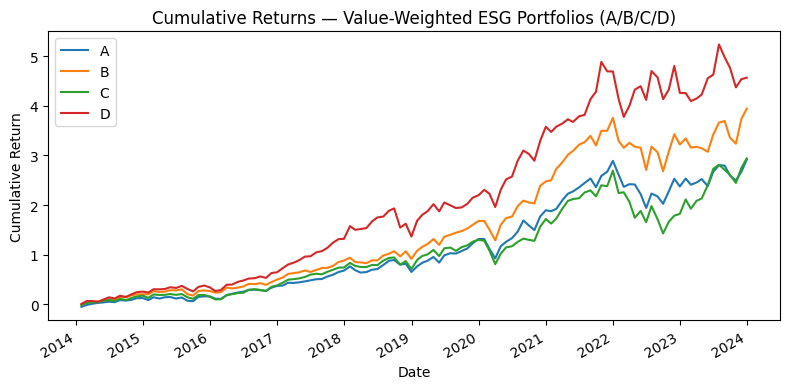

In [8]:
import matplotlib.pyplot as plt

# --- Annual returns by ESG group (from value-weighted monthly series) ---
annual_vw = ((1.0 + vw_df).groupby(vw_df.index.year).prod() - 1.0)  # Year × Group

# Average annual return per group
avg_annual_vw = annual_vw.mean().to_frame("Average Annual Return").T

# --- Cumulative return curves (value-weighted) ---
cum_vw = (1.0 + vw_df).cumprod() - 1.0

# --- Plot all four cumulative curves on ONE graph ---
ax = cum_vw.plot(figsize=(8, 4))  # multiple series; no explicit colors
ax.set_title("Cumulative Returns — Value-Weighted ESG Portfolios (A/B/C/D)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return")
plt.tight_layout()
plt.show()



### **8. Compare Performance Across ESG Groups**

Compute, for each ESG portfolio (A–D), the average monthly return and volatility (standard deviation) of monthly returns. <br>
Report the annualized Sharpe ratio for each group. Discuss whether higher ESG scores are associated with higher or lower risk-adjusted returns.

In [9]:
stats = pd.DataFrame(index=vw_df.columns)
stats["Average Monthly Return"] = vw_df.mean(skipna=True)
stats["Monthly Volatility"] = vw_df.std(skipna=True)

# Annualized Sharpe Ratio (mean / std) * sqrt(12)
stats["Annualized Sharpe Ratio"] = (stats["Average Monthly Return"] / stats["Monthly Volatility"]) * np.sqrt(12)

# Convert to %
stats["Average Monthly Return"] = stats["Average Monthly Return"] * 100
stats["Monthly Volatility"] = stats["Monthly Volatility"] * 100

display(stats.round(3))

,Average Monthly Return,Monthly Volatility,Annualized Sharpe Ratio
A,1.238,4.344,0.987
B,1.440,4.490,1.111
C,1.277,5.062,0.874
D,1.555,4.791,1.124


### **9. Long–Short ESG Factor Portfolio**

Construct a zero-cost ESG factor: long the “Leader” portfolio (Group A) and short the <br>
“Laggard” portfolio (Group D). Compute its monthly returns, average monthly return, <br>
and cumulative performance. Plot the cumulative return of this long–short factor over <br>
time. Discuss whether the ESG factor appears to be priced.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Construct the long–short ESG factor (A - D)
esg_factor = vw_df["A"] - vw_df["D"]
esg_factor.name = "ESG_Factor"

# Compute summary statistics
avg_monthly = esg_factor.mean()
vol_monthly = esg_factor.std()
sharpe_annualized = (avg_monthly / vol_monthly) * np.sqrt(12)

print("Long–Short ESG Factor (A - D) Performance Metrics")
print("------------------------------------------------")
print(f"Average Monthly Return: {avg_monthly*100:.3f}%")
print(f"Monthly Volatility:     {vol_monthly*100:.3f}%")
print(f"Annualized Sharpe Ratio: {sharpe_annualized:.3f}")


Long–Short ESG Factor (A - D) Performance Metrics
------------------------------------------------
Average Monthly Return: -0.317%
Monthly Volatility:     3.211%
Annualized Sharpe Ratio: -0.342


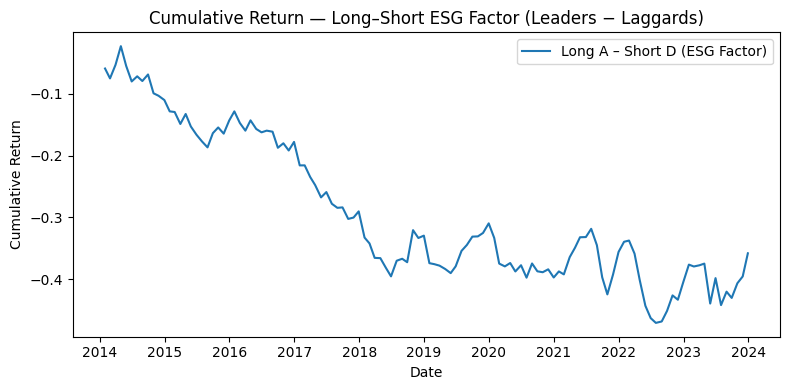

In [11]:
# Cumulative Performance
cum_factor = (1 + esg_factor.fillna(0)).cumprod() - 1

# Plot cumulative ESG factor performance
plt.figure(figsize=(8,4))
plt.plot(cum_factor.index, cum_factor, label="Long A – Short D (ESG Factor)")
plt.title("Cumulative Return — Long–Short ESG Factor (Leaders − Laggards)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.tight_layout()
plt.show()


### **10. Correlation Between ESG Scores and Firm Characteristics**
Examine the cross-sectional correlation between ESG scores and firm size (market cap- <br>
italization) and, separately, between ESG scores and past returns (e.g., prior 12-month <br>
return excluding the most recent month if available). Interpret whether ESG may proxy <br>
for other characteristics (e.g., size, quality, or momentum) rather than capturing a dis- <br>
tinct factor.

In [12]:
import pandas as pd
import numpy as np

# Market cap (size) by firm-year
df1 = df.copy()
df1["ME"] = df1["PRC"].abs() * df1["SHROUT"] * 1000   # CRSP: SHROUT in thousands
df1["Year"] = df1["date"].dt.year
size_yr = (df1.groupby(["TICKER","Year"])["ME"]
             .mean().reset_index()
             .rename(columns={"TICKER":"Ticker", "ME":"Avg_MarketCap"}))

# Merge with ESG and keep rows we can use
esg_size = (esg.merge(size_yr, on=["Ticker","Year"], how="inner")
              .dropna(subset=["ESG Score","Avg_MarketCap"]))

# Pooled correlation: ESG vs log(Size)
corr_pooled = esg_size["ESG Score"].corr(np.log(esg_size["Avg_MarketCap"]))
print(f"Pooled Corr[ESG, log(Size)]: {corr_pooled:.3f}")

corr_by_year = esg_size.groupby("Year").apply(
    lambda g: g["ESG Score"].corr(np.log(g["Avg_MarketCap"]))
)
display(corr_by_year.round(3))


Pooled Corr[ESG, log(Size)]: 0.481


/var/folders/bs/5f0ys9r13_l1yqx_3qv0ncg80000gn/T/ipykernel_82568/2626978476.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_year = esg_size.groupby("Year").apply(


Year
2014    0.478
2015    0.531
2016    0.534
2017    0.492
2018    0.470
2019    0.431
2020    0.377
2021    0.307
2022    0.304
2023    0.269
dtype: float64